In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [49]:
from tarfile import data_filter


data = pd.read_csv('train.csv')
data.sort_values('label')
data.head()

data_test = pd.read_csv('test.csv')




In [50]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_test = np.array(data_test)
j, k = data_test.shape

Y_test = data_test[0]
X_test = data_test[1:k]
X_test = X_test / 255.

data_train = data.T
X_train = data_train[1:n]
Y_train = data_train[0]
X_train = X_train / 255.
_,m_train = X_train.shape
X_train

array([[0.23921569, 1.        , 0.2       , ..., 0.60784314, 0.        ,
        0.54509804],
       [0.18823529, 1.        , 0.54117647, ..., 0.62745098, 0.        ,
        0.5372549 ],
       [0.29019608, 1.        , 0.5372549 , ..., 0.61960784, 0.01568627,
        0.54509804],
       ...,
       [0.43921569, 1.        , 0.40784314, ..., 0.59215686, 0.        ,
        0.54117647],
       [0.40784314, 1.        , 0.40392157, ..., 0.61568627, 0.        ,
        0.53333333],
       [0.43529412, 1.        , 0.39607843, ..., 0.56078431, 0.        ,
        0.55686275]])

In [51]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    smax = np.exp(Z) / sum(np.exp(Z))
    return smax

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def deriv_ReLU(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() +1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2  
    

In [52]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 500 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ", get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [53]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 10, 0.1)

Iteration:  0
[4 4 4 ... 4 5 4] [0 3 8 ... 1 7 6]
Accuracy:  0.1025


In [54]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    map = {
        0: 'bart simpson',
        1: 'charles montgomery_burns',
        2: 'homer simpson',
        3: 'krusty the clown',
        4: 'lisa simpson',
        5: 'marge simpson',
        6: 'milhouse van houten',
        7: 'moe szyslak',
        8: 'ned flanders',
        9: 'principal skinner'
    }
    
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", map[prediction[0]])
    print("Label: ", map[label])
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  milhouse van houten
Label:  bart simpson


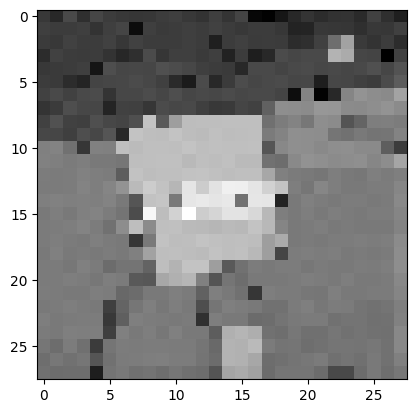

Prediction:  krusty the clown
Label:  krusty the clown


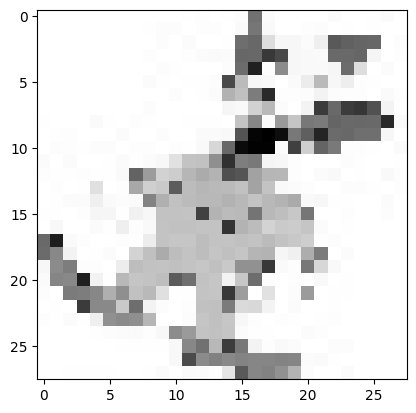

Prediction:  moe szyslak
Label:  ned flanders


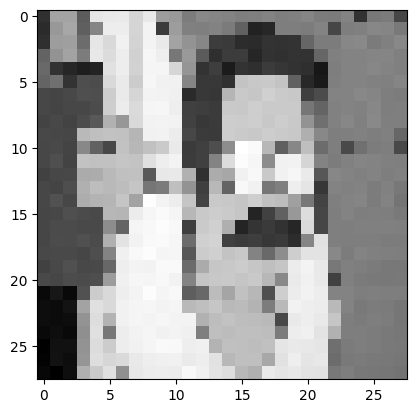

Prediction:  principal skinner
Label:  krusty the clown


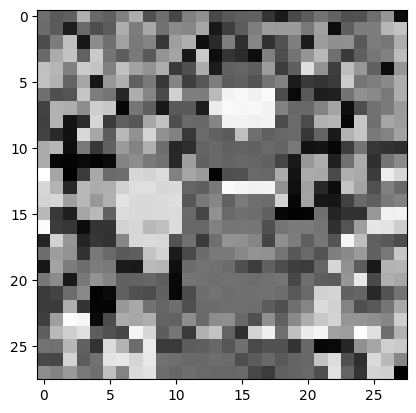

In [55]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [56]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
accuracy = get_accuracy(test_predictions, Y_test)
print("Accuracy: ",accuracy)


[1 8 5 5 5 8 3 3 3 5 3 8 3 5 3 3 3 3 3 3 8 1 8 7 8 9 7 3 3 3 5 5 5 5 3 3 3
 8 8 8 1 1 8 8 1 1 1 8 1 1 1 1 6 1 3 3 9 8 8 5 3 5 3 3 3 4 1 8 1 1 8 1 1 8
 8 3 5 8 8 8 8 3 8 8 8 5 5 5 3 8 3 3 8 8 1 8 7 6 6 1 8 1 1 8 8 8 8 8 8 5 8
 8 8 1 3 1 1 8 3 4 8 3 8 5 8 1 3 8 7 8 8 8 8 8 8 8 5 5 8 8 7 1 6 1 1 8 5 5
 5 5 3 5 8 8 8 8 8 8 8 5 8 8 8 7 7 8 7 7 7 1 1 1 1 3 3 3 3 8 5 3 8 8 8 8 8
 1 8 8 8 8 8 3 6 8 8 8 8 8 8 1 3 8 8 8 8 3 3 1 8 1 7 7 6 1 8 8 5 8 3 0 8 1
 8 8 8 8 8 8 8 5 3 3 8 5 1 1 1 1 1 4 6 3 8 5 8 3 1 6 8 8 7 7 1 8 5 8 6 8 5
 5 5 5 6 6 6 1 6 6 2 6 6 6 6 5 3 2 3 2 7 8 1 8 8 8 8 5 5 7 7 7 3 6 2 6 6 2
 2 6 6 6 6 6 2 3 8 3 3 8 4 8 8 8 1 2 1 3 5 8 2 6 6 6 1 2 2 1 6 9 3 3 3 3 5
 3 6 1 1 8 5 5 5 5 3 3 8 5 6 6 6 6 6 2 7 6 6 4 6 3 3 3 2 6 6 8 6 3 8 8 6 8
 1 3 2 5 2 2 2 6 6 2 2 2 6 9 1 2 7 3 5 7 0 1 1 8 1 5 6 6 3 3 3 3 8 1 2 2 2
 6 2 2 3 9 8 3 7 9 7 2 7 7 1 2 6 1 0 6 6 3 3 3 3 1 2 6 1 2 7 3 3 8 3 8 6 6
 7 2 8 6 8 8 6 6 6 8 6 8 6 3 3 1 3 2 6 6 2 7 6 3 3 7 2 1 7 7 7 7 8 3 6 1 6
 5 3 3 6 8 3 3 3 1 7 3 3 

# Bonus Task